In [23]:
import pandas as pd

In [24]:
from tabulate import tabulate

In [25]:
pip install mysql-connector-python

In [26]:
import mysql.connector as sql

In [27]:
db_connection = sql.connect(host='208.109.18.154', database='ids2db', user='ids2', password='Lqt6181')
db_cursor = db_connection.cursor()
db_cursor.execute('SELECT * FROM Life_Expectancy')

table_rows = db_cursor.fetchall()

LifeDF = pd.DataFrame(table_rows)

print(tabulate(LifeDF, headers='keys', tablefmt='fancy_grid'))


╒═════╤══════════════════════════╤══════╤══════╤═════╤══════════╤══════════════╤══════╤═══════╤══════════════╤════════════╤═════════╕
│     │ 0                        │    1 │    2 │   3 │        4 │            5 │    6 │     7 │            8 │          9 │      10 │
╞═════╪══════════════════════════╪══════╪══════╪═════╪══════════╪══════════════╪══════╪═══════╪══════════════╪════════════╪═════════╡
│   0 │ Afghanistan              │ 2010 │ 58.8 │ 279 │  0.01    │    79.6794   │ 16.7 │  9.2  │    553.329   │    2883167 │  9.2    │
├─────┼──────────────────────────┼──────┼──────┼─────┼──────────┼──────────────┼──────┼───────┼──────────────┼────────────┼─────────┤
│   1 │ Afghanistan              │ 2011 │ 59.2 │ 275 │  0.01    │     7.09711  │ 17.2 │  7.87 │     63.5372  │    2978599 │  9.5    │
├─────┼──────────────────────────┼──────┼──────┼─────┼──────────┼──────────────┼──────┼───────┼──────────────┼────────────┼─────────┤
│   2 │ Afghanistan              │ 2012 │ 59.5 │ 272 │  0.01  

In [28]:
LifeDF.columns = ['Country', 'Year', 'Life_Expectancy','Adult_Mortality','Alcohol','Percentage_Expenditure','BMI','Total_Expenditure','GDP','Population','Schooling']

print(tabulate(LifeDF, headers='keys', tablefmt='fancy_grid'))

╒═════╤══════════════════════════╤════════╤═══════════════════╤═══════════════════╤═══════════╤══════════════════════════╤═══════╤═════════════════════╤══════════════╤══════════════╤═════════════╕
│     │ Country                  │   Year │   Life_Expectancy │   Adult_Mortality │   Alcohol │   Percentage_Expenditure │   BMI │   Total_Expenditure │          GDP │   Population │   Schooling │
╞═════╪══════════════════════════╪════════╪═══════════════════╪═══════════════════╪═══════════╪══════════════════════════╪═══════╪═════════════════════╪══════════════╪══════════════╪═════════════╡
│   0 │ Afghanistan              │   2010 │              58.8 │               279 │   0.01    │                79.6794   │  16.7 │                9.2  │    553.329   │      2883167 │      9.2    │
├─────┼──────────────────────────┼────────┼───────────────────┼───────────────────┼───────────┼──────────────────────────┼───────┼─────────────────────┼──────────────┼──────────────┼─────────────┤
│   1 │ Afghani

In [29]:
from scipy.stats import pearsonr

data1 = LifeDF['Adult_Mortality']
data2 = LifeDF['Life_Expectancy']
data3 = LifeDF['BMI']
data4 = LifeDF['Alcohol']
data5 = LifeDF['Population']
data6 = LifeDF['Total_Expenditure']
data7 = LifeDF['GDP']

corr5, _ = pearsonr(data1, data2)
print('Adult Mortality correlation: %.5f' % corr5)

corr, _ = pearsonr(data3, data2)
print('Eating Habits correlation: %.5f' % corr)

corr1, _ = pearsonr(data4, data2)
print('Alcohol correlation: %.5f' % corr1)

corr2, _ = pearsonr(data5, data2)
print('Population correlation: %.5f' % corr2)

corr3, _ = pearsonr(data6, data2)
print('Total Expenditures correlation: %.5f' % corr3)
corr4, _ = pearsonr(data7, data2)
print('GDP correlation: %.5f' % corr4)

Adult Mortality correlation: -0.69913
Eating Habits correlation: 0.47074
Alcohol correlation: 0.41723
Population correlation: -0.02695
Total Expenditures correlation: 0.10357
GDP correlation: 0.44076


Looking at the coorelations between the different attributes, we can see that the coorelations were all fairly weak. The best coorelations were Adult mortality with the highest negative correlation and Eating Habits with the highest positive coorelation followed closely by Total Expeditures.

Answer the following questions by performing correlation analysis:

How does Adult mortality rates affect life expectancy?

**The Life Expectancy increases as the Adult Mortality Rate decreases. This can be seen by the negative coorelation as well as seen in the Linear Regression model below.**


Does life expectancy have positive or negative correlation with eating habits, drinking alcohol, social factors, and economic factors?

**Eating Habits:Positive**

**Drinking Alcohol:Positive**

**Social Factors:Negative**

**Economic factors:Positive**


What is the impact of schooling on the lifespan of humans?

**The more years of educaton, the longer the life expectancy is for an individual.**

In [30]:
from sklearn.linear_model import LinearRegression

import numpy as np
import matplotlib.pyplot as plt

In [31]:
LRdata = LifeDF

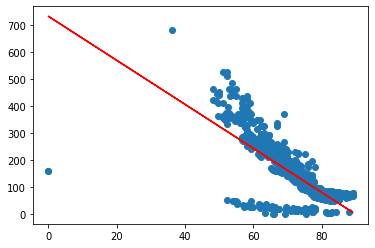

In [32]:
X3 = LRdata.iloc[:, 2].values.reshape(-1,1)

# Save the second column (all the rows) in Y
Y3 = LRdata.iloc[:, 3].values.reshape(-1,1)

# Create the model
LRmodel1 = LinearRegression()  

# Perform linear regression
LRmodel1.fit(X3, Y3)


# Make predictions
Y_pred3 = LRmodel1.predict(X3)  


# Visualize the dataset and the regression line:
plt.scatter(X3, Y3)
plt.plot(X3, Y_pred3, color='red')

plt.show()


In [33]:
print("The slope: ", LRmodel1.coef_)
print("The intercept: ", LRmodel1.intercept_)


The slope:  [[-8.1571729]]
The intercept:  [732.91517023]


In [34]:
from sklearn.metrics import mean_squared_error, r2_score

print("MSE: ", mean_squared_error(Y3, Y_pred3))
print("R2: ", r2_score(Y3, Y_pred3))

MSE:  6296.888119974716
R2:  0.48877738924724057


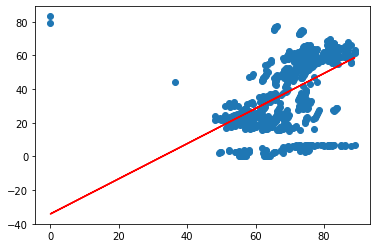

In [35]:
X2 = LRdata.iloc[:, 2].values.reshape(-1,1)

# Save the second column (all the rows) in Y
Y2 = LRdata.iloc[:, 6].values.reshape(-1,1)

# Create the model
LRmodel3 = LinearRegression()  

# Perform linear regression
LRmodel3.fit(X2, Y2)


# Make predictions
Y_pred2 = LRmodel3.predict(X2)  


# Visualize the dataset and the regression line:
plt.scatter(X2, Y2)
plt.plot(X2, Y_pred2, color='red')

plt.show()


In [36]:
print("The slope: ", LRmodel3.coef_)
print("The intercept: ", LRmodel3.intercept_)


The slope:  [[1.04424211]]
The intercept:  [-34.16707179]


In [37]:
from sklearn.metrics import mean_squared_error, r2_score

print("MSE: ", mean_squared_error(Y2, Y_pred2))
print("R2: ", r2_score(Y2, Y_pred2))

MSE:  346.5798258507431
R2:  0.2215920118929937


y= Life_Expectancy

x1= Adult_Mortality

x2= BMI

y = (-7.87)x1 + 712.209

MSE:  6774.677574449944

R2:  0.4526019489966343

y = (1.044)x2 - 34.167

MSE:  346.5798258507431

R2:  0.2215920118929937

When looking at the highest negative and positive coorelation between the Attributes and Life Expectancy, the graphs seem to have several zeros that throw off the percent coorelation. When looking at the Adult Mortality rate in comparison to Life Expectancy, as one would assume, as Mortality increased, life expectancy decreases. The more deaths there are, the less likely that a country would have a higher mortality rate. However, there were several countries with low adult mortality numbers but still low life expectancy. I am not exactly sure why those numbers produce those results but I assume it is based off of a strong coorelation between one of the other attributes, such as BMI. Speaking of BMI, it had the highest positive coorelation to Life expectnacy. As the average BMI for a country increases, the life expectancy increases. Between the two models, the Adult Mortality model preformed the best. it had a higher coorelation value, although negative. It was closer to -1 then the BMI positive coorelation was close to 1. It means that it was more strongly negatively coorelated with the Adult Mortality coorelation.
